## 2.2. Método da bisseção

Muitos problemas em ciências e engenharia envolvem a resolução de uma equação que pode ser colocada na forma 

$$f(x)=0$$

Em alguns casos a solução exata $\overline{x}$ pode ser encontrada por processos analíticos, quando isso não for possível, uma solução aproximada pode ser obtida por métodos numéricos.

Encontrar um solução para equação $f(x)=0$  por métodos numéricos consiste em gerar uma sequência de soluções aproximadas, a partir de uma aproximação inicial $x_0$. Caso os valores obtidos pelo processo iterativo estejam se aproximando da solução exata $\overline{x}$, dizemos que a sequência está convergindo para a solução. 

O *Método da Bisseção* é o método numérico para resolução de equações do tipo $f(x)=0$, no qual, a partir de um intervalo inicial $[a,b]$ contendo uma única raiz, é gerada uma sequência de subintervalos, dividindo-se, a cada iteração, o intervalo que contém a raiz em dois subintervalos de mesma amplitude. A cada passo, é verificado qual dos dois subintervalos contém a raiz utilizando o teorema de Bolzano (ou Teorema do Valor Intermediário), enunciado abaixo. 

### Teorema de Bolzano:

Se $f(x)$ é contínua em $[a,b]$ e $f(a)\cdot f(b)<0$, então existe pelo menos uma raíz $ \overline{x} \in [a,b]$ tal que $f(x)=0$.

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/2_ZEROS_DE_FUNCOES/imagens/bolzano.png" width="480">

A sequência de subintervalos será calculada até que a amplitude do intervalo obtido menor que uma tolerância pré estabelecida. Assim, podemos descrever o processo no seguinte algoritmo:

1. Determinar um intervalo inicial $[a,b]$ contendo uma única raíz de $f$;

2. Calcular o ponto médio $x_m=\frac{b+a}{2}$. 

3. Se $|b-a|>\epsilon$ ou $E_{rel}<\epsilon$ segue, senão, assumir $\overline{x}\approx x_m$ e parar;

4. Se $f(x_m)=0$, então, a raiz $\overline{x}$ é o próprio $x_m$;

5. Se $f(a)\cdot f(x_m)<0$ fazemos $b=x_m$, senão fazemos $a=x_m$  e voltamos ao passo 2;

### Número de iterações
Podemos estimar o número de iterações necessárias para encontrar a aproximação para a raiz $\overline{x}$ com a precisão desejada. Considerando que a cada iteração o intervalo é dividido ao meio, então na n-ésima iteração tem-se um intervalo de amplitude $\frac{b-a}{2^n}$, então, queremos que 

$$\frac{b-a}{2^{n+1}}<\epsilon$$

ou 

$$ log\left( \frac{b-a}{2^{n+1}}\right)<log(\epsilon)$$

que leva a

$$ n>\frac{log(b-a)-log(\epsilon)}{log2}-1$$

Assim, $n$ é o número mínimo de iterações que devem ser realizadas para se obter $\overline{x}$ com precisão $\epsilon$.


**Exemplo 2.2.1:**
Usando o método da bisseção, resolva a equação $x^2+ln(x)=0$, com $\epsilon = 0.01$. 

*Solução:* Reescrevendo a equação como $x^2=-ln(x)$ e esboçando os gráficos de $f_1(x)=x^2$ e $f_2(x)=-ln(x)$ observamos que existe uma raiz no intervalo $[0.1,1]$.

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/2_ZEROS_DE_FUNCOES/imagens/3.3_exemplo_1loc.png" width="400">

Então, na primeira iteração fazemos $x_m = \frac{a+b}{2}=\frac{1.0-0.1}{2}=0.55$. Como $f(a)=f(0.1)=-2.293$, $f(b)=f(1.0)=1$ e $f(x_m)=f(0.55)=-0.295$ temos que a raíz está no intervalo $[x_m,b]$. Além disso, $\frac{|x_1-x_0|}{|x_0|}=0.2953$ é maior que $\epsilon = 0.01$. Então seguimos o processo iterativo obtendo a sequên
cia abaixo.

<img src="https://github.com/tiagoburiol/metodos_numericos_em_python/blob/main/2_ZEROS_DE_FUNCOES/imagens/3.3_exemplo_1tab.png?raw=true" width="400">


Em Python podemos fazer o gráfico como é mostrado a seguir 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4,3]

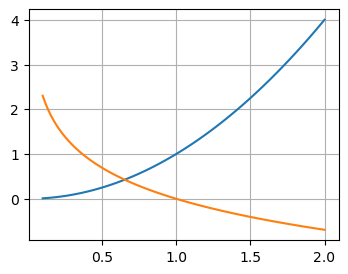

In [2]:
f1 = lambda x: x**2
f2 = lambda x: -np.log(x)

xi = np.linspace(0.1, 2, 100)

plt.plot(xi, f1(xi))
plt.plot(xi, f2(xi))
plt.grid()

As iterações para encontrar uma aproximação podem ser obtidas como  é mostrado abaixo:

In [3]:
a = 0.1; b = 1.0; err = 10.0; x_ant = 0.0

f = lambda x: x**2 + np.log(x)

for i in range(8):
    x = (a+b)/2.0
    if f(x)*f(a) < 0:
        b = x
    else:
        a = x
    print ("x =", round(x,4))

x = 0.55
x = 0.775
x = 0.6625
x = 0.6063
x = 0.6344
x = 0.6484
x = 0.6555
x = 0.652


**Exemplo 2.2.2:**
Calcular, pelo método da bisseção, corretamente até a terceira casa decimal, a raiz da equação  $ \left( \frac{x}{2} \right)^2 -sen(x) = 0 $, localizada no intervalo ($a_0=1,5$ e $b_0=2$).

In [4]:
a = 1.5
b = 2.0
err = 1.0
x_ant = 0.0

def f(x):
    y = (0.5*x)**2-np.sin(x)
    return y

while err>0.0001:
    x = (a+b)/2.0

    if f(x)*f(a) < 0:
        b = x
    elif f(x)*f(a) > 0:
        a = x
    else:
        print ("A raiz exata é x=", x)
        break 
        
    err = abs(x-x_ant)
    x_ant = x
    
    print ("x = %.4f"%x,"| Err = %.4f"% err)

x = 1.7500 | Err = 1.7500
x = 1.8750 | Err = 0.1250
x = 1.9375 | Err = 0.0625
x = 1.9062 | Err = 0.0312
x = 1.9219 | Err = 0.0156
x = 1.9297 | Err = 0.0078
x = 1.9336 | Err = 0.0039
x = 1.9355 | Err = 0.0020
x = 1.9346 | Err = 0.0010
x = 1.9341 | Err = 0.0005
x = 1.9338 | Err = 0.0002
x = 1.9337 | Err = 0.0001
x = 1.9338 | Err = 0.0001


**Exemplo 2.2.3:**
Use o método da bisseção para obter um zero da função $f(x)=x\log x-1$ com precisão $\epsilon = 0.01$

In [5]:
from math import log10 

a = 2.0
b = 3.0
err = 1.0
x_ant = a
i = 0

f = lambda x:x*log10(x)-1

while err>0.01:
    x = (a+b)/2.0
    err = abs(x - x_ant)/abs(x)
    print (i, a, b, x, round(f(a),5), round(f(b),5), round(f(x),5), round(err,5))
    
    if f(a)*f(x)<0:
        b = x
    else: 
        a = x

    i = i+1
    x_ant = x
    

0 2.0 3.0 2.5 -0.39794 0.43136 -0.00515 0.2
1 2.5 3.0 2.75 -0.00515 0.43136 0.20816 0.09091
2 2.5 2.75 2.625 -0.00515 0.20816 0.10021 0.04762
3 2.5 2.625 2.5625 -0.00515 0.10021 0.0472 0.02439
4 2.5 2.5625 2.53125 -0.00515 0.0472 0.02094 0.01235
5 2.5 2.53125 2.515625 -0.00515 0.02094 0.00787 0.00621


**Exemplo 2.2.4:**
Localize e as raízes e use o método da bisseção para obter os zero da função $f(x)=x^3-9x+3$ com precisão $\epsilon = 10^{-3}$


**Solução:** Nesse exemplo, vamos começar fazendo o gráfico da função.

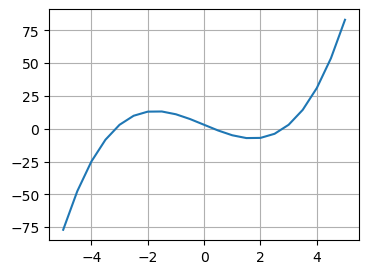

In [6]:
xi = np.linspace(-5, 5, 21)
f = lambda x: x**3-9*x+3

plt.plot(xi, f(xi))
plt.grid()
plt.show()

Pelo gráfico, podemos ver que parece existirem três raízes distintas $x_1 \in (-4,-3)$, $x_2 \in (0, 1)$ e $x_3 \in (2,3)$. Vamos confirmar criando uma tabela de valores com o código a seguir.

In [7]:
xi =  np.linspace(-4,3, 15)
for x in xi:
    print (x, f(x))

-4.0 -25.0
-3.5 -8.375
-3.0 3.0
-2.5 9.875
-2.0 13.0
-1.5 13.125
-1.0 11.0
-0.5 7.375
0.0 3.0
0.5 -1.375
1.0 -5.0
1.5 -7.125
2.0 -7.0
2.5 -3.875
3.0 3.0


Pela tabela, confirmamos a existência das raízes nos segintes intervalos: $x_1 \in (-3.5,-3)$, $x_2 \in (0, 0.5)$ e $x_3 \in (2.5,3)$. usaremos agora o método da bisseção para encontrar cada uma das raízes com erro inferior a $10^{-3}$. Faremos isso criando uma função para o método da bisseção, cujos argumantos de entrada são o intervalo inicial(a,b) e a precisão $\epsilon$.

In [8]:
def bissec(f, a, b, eps):
    err = 100
    x_ant = a
    while err>0.01:
        x = (a+b)/2.0
        err = abs(x - x_ant)/abs(x)
        if f(a)*f(x)<0:
            b = x
        else: 
            a = x
        x_ant = x
    return (x)

eps = 10**(-3)

print ("x1 =", bissec(f, -3.5, -3, eps))
print ("x2 =", bissec(f, 0, 0.5, eps))
print ("x3 =", bissec(f, 2.5, 3, eps))

x1 = -3.15625
x2 = 0.337890625
x3 = 2.828125


### Exercícios


**1.** Localize graficamente e determine as raízes reais das funções dadas. Estime o erro relativo a cada iteração e pare quando $\epsilon \leq 1\% $.

a) $f(x) = –0.5x^2 + 2.5x + 4.5$

b) $f(x) = 5x^2 – 5x^2 + 6x -2$

c) $f(x) = –25 + 82x – 90x^2 + 44x^3 – 8x^4 + 0.7x^5$

d) $f(x) = – 12 – 21x + 18x^2 – 2.75x^3$


**2.** Como mostrado na figura abaixo, a velocidade da água, $v(m/s)$, descarregada de um tanque cilíndrico através de um cano longo pode ser calculada por

$$ v = \sqrt{2gH} \tanh \left( \frac{\sqrt{2gH}}{2L}t \right)$$

em que $g=9.81m/s^2$, $H$ é a altura inicial $(m)$, $L$ é o comprimento do cano ($m$) e $t$ é o tempo decorrido ($s$). Determine a altura necessária para atingir $v=5m/s$ em $2.5s$ para um cano de $4m$ de comprimento pelo método da bisseção e pelo método do ponto-fixo com $\epsilon =  0.001$


<img src="imagens/tanque_de_agua.png" width="360">

**3.** Água está escoando em um canal trapezoidal a uma vazão de Q = 20 m$^3$/s. A profundidade crítica $y$ para tal canal deve satisfazer a equação

$$0=1- \frac{Q^2}{gA_c^3}B$$

onde $g$ = 9.81 m/s$^2$, $A_c$ é a área da seção transversal (m$^2$) e $B$ é a largura do canal na superfície (m). Para esse caso, a largura e a área transversal podem ser relacionadas à profundidade $y$ por
<p style="text-align:center;">
$B = 3+y \,\,\,\,$  e $\,\,\,\,A_c=3y+\frac{y^2}{2}$
    </p>
    
Encontre a profundidade crítica usando o método gráfico da bissecção e itere até que o erro aproximado fique abaixo de 1%. Discuta seus resultados